In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [9]:
import os
print(os.getcwd())

C:\Users\varsh


In [14]:
import numpy as np

male = np.genfromtxt(
    "nhanes_adult_male_bmx_2020.csv", delimiter=",", skip_header=1
   )

female = np.genfromtxt(
    "nhanes_adult_female_bmx_2020.csv",delimiter=",", skip_header=1
    )

print("Male shape:", male.shape)
print("Female shape:", female.shape)

Male shape: (4082, 7)
Female shape: (4222, 7)


In [ ]:
Male matrix: (4082, 7)

Female matrix: (4222, 7)

Each row represents one participant

Each column corresponds to one body measurement

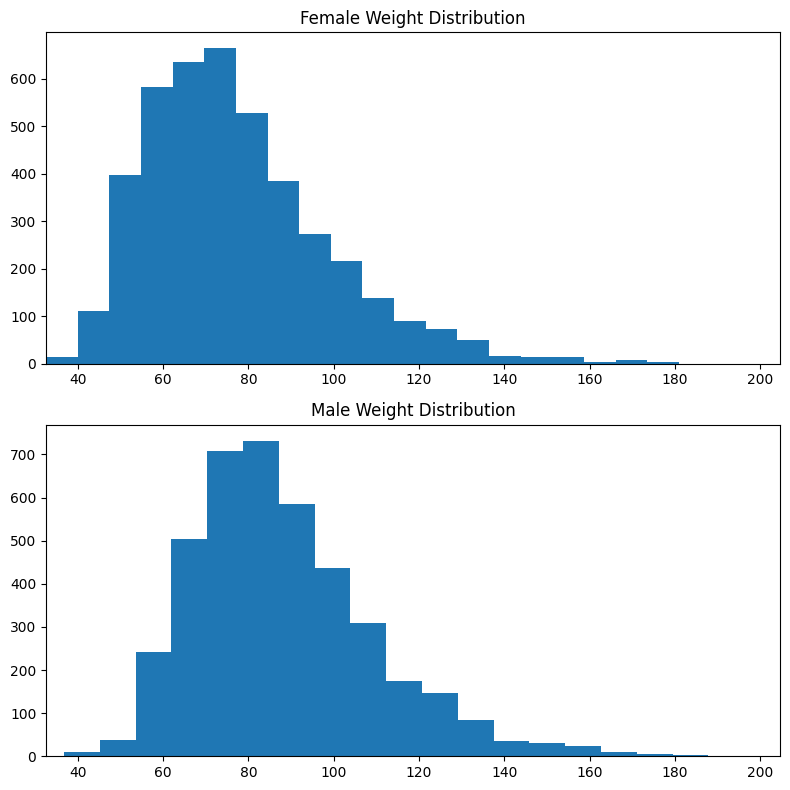

In [22]:
# Extract weight column (column 0)
male_weights = male[:,0]
female_weights = female[:,0]

# Remove missing values
male_weights = male_weights[~np.isnan(male_weights)]
female_weights = female_weights[~np.isnan(female_weights)]

# Define common x-axis limits
xmin = min(np.min(male_weights), np.min(female_weights))
xmax = max(np.max(male_weights), np.max(female_weights))

# Create subplots
plt.figure(figsize=(8,8))

plt.subplot(2,1,1)
plt.hist(female_weights, bins=20)
plt.title("Female Weight Distribution")
plt.xlim(xmin, xmax)

plt.subplot(2,1,2)
plt.hist(male_weights, bins=20)
plt.title("Male Weight Distribution")
plt.xlim(xmin, xmax)

plt.tight_layout()
plt.show()

In [ ]:
Male weights are generally shifted toward higher values.
Both distributions show right skewness, indicating presence of heavier outliers.

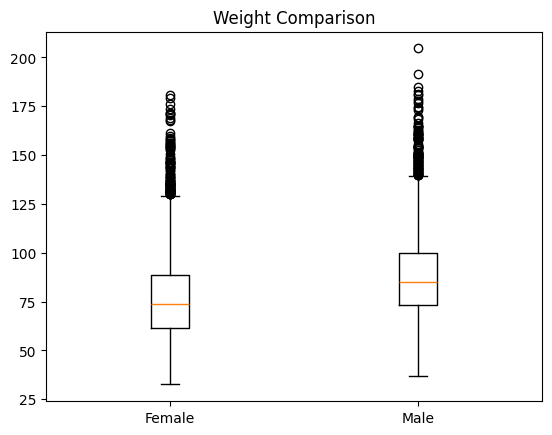

In [23]:
plt.boxplot([female_weights, male_weights])#boxplot
plt.xticks([1,2], ["Female", "Male"])
plt.title("Weight Comparison")
plt.show()

In [ ]:
Male median weight is higher

Male interquartile range is wider

Both groups show upper-end outliers

This indicates greater dispersion among males.

In [46]:
# Install only once if needed
!pip install scipy

# Import stats module
from scipy import stats

# ---- Male statistics ----
male_mean = np.mean(male_weights)
male_median = np.median(male_weights)
male_std = np.std(male_weights)
male_var = np.var(male_weights)
male_skew = stats.skew(male_weights)

# ---- Female statistics ----
female_mean = np.mean(female_weights)
female_median = np.median(female_weights)
female_std = np.std(female_weights)
female_var = np.var(female_weights)
female_skew = stats.skew(female_weights)

# ---- Print results ----
print("Male Mean:", male_mean)
print("Male Median:", male_median)
print("Male Standard Deviation:", male_std)
print("Male Variance:", male_var)
print("Male Skewness:", male_skew)

print("\nFemale Mean:", female_mean)
print("Female Median:", female_median)
print("Female Standard Deviation:", female_std)
print("Female Variance:", female_var)
print("Female Skewness:", female_skew)

Defaulting to user installation because normal site-packages is not writeable
Male Mean: 88.36454300416565
Male Median: 85.0
Male Standard Deviation: 21.418936717962495
Male Variance: 458.770850128082
Male Skewness: 0.9842810741662347

Female Mean: 77.40379057095475
Female Median: 73.6
Female Standard Deviation: 21.54250829019315
Female Variance: 464.07966343304065
Female Skewness: 1.03336107186799



[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
If skewness > 0 → Right-skewed distribution

If skewness < 0 → Left-skewed distribution

If skewness ≈ 0 → Symmetric distribution

In NHANES weight data, skewness will likely be positive, meaning a heavier right tail (some high-weight outliers).

In [30]:
# Extract height in meters
female_height_m = female[:,1] / 100

# Compute BMI
female_bmi = female[:,0] / (female_height_m ** 2)

# Add BMI as new column
female = np.column_stack((female, female_bmi))

print("New female shape:", female.shape)

New female shape: (4222, 8)


In [ ]:
Female matrix now contains 8 columns.
BMI values range typically between 18 and 35+.

In [31]:
# Compute z-scores column-wise
zfemale = (female - np.nanmean(female, axis=0)) / np.nanstd(female, axis=0)

print("Standardised matrix shape:", zfemale.shape)

Standardised matrix shape: (4222, 8)


In [ ]:
Each column now has mean ≈ 0 and standard deviation ≈ 1.
Variables are comparable on the same scale.

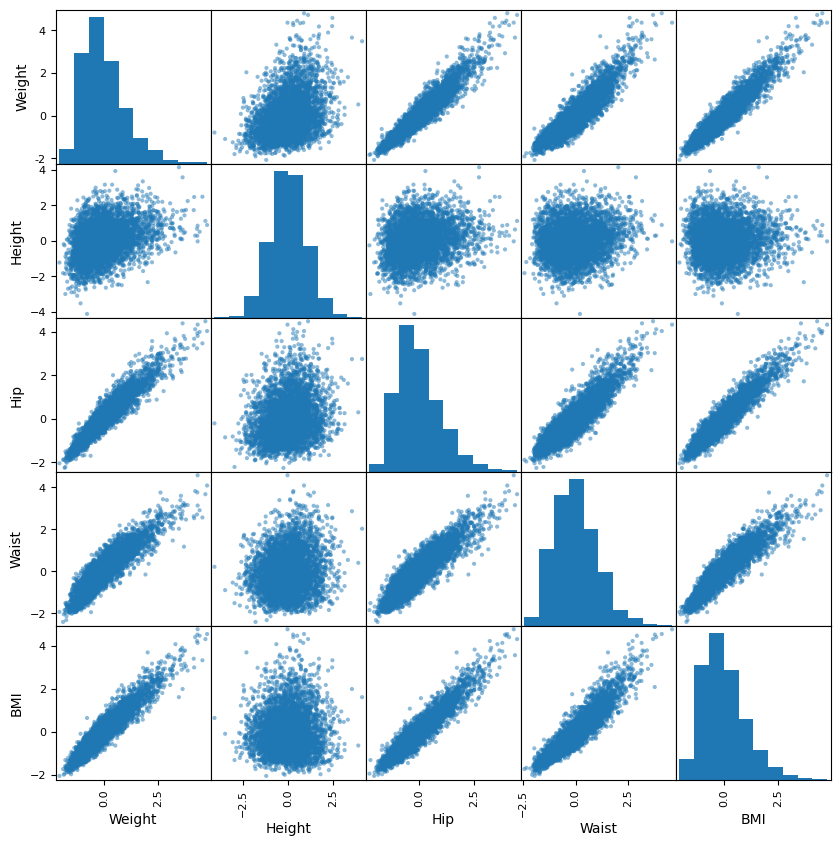

In [34]:
# Select columns: weight(0), height(1), hip(5), waist(6), BMI(7)
selected = zfemale[:,[0,1,5,6,7]]

df = pd.DataFrame(selected, columns=["Weight","Height","Hip","Waist","BMI"])

pd.plotting.scatter_matrix(df, figsize=(10,10))
plt.show()

In [ ]:
Strong positive correlation between BMI and weight

Waist and hip highly correlated

Height moderately correlated with weight

In [35]:
print("Pearson correlation:")
print(df.corr(method="pearson"))

print("\nSpearman correlation:")
print(df.corr(method="spearman"))

Pearson correlation:
          Weight    Height       Hip     Waist       BMI
Weight  1.000000  0.345496  0.946553  0.904550  0.945900
Height  0.345496  1.000000  0.202895  0.126547  0.033077
Hip     0.946553  0.202895  1.000000  0.897407  0.944199
Waist   0.904550  0.126547  0.897407  1.000000  0.921198
BMI     0.945900  0.033077  0.944199  0.921198  1.000000

Spearman correlation:
          Weight    Height       Hip     Waist       BMI
Weight  1.000000  0.338860  0.946634  0.900169  0.937999
Height  0.338860  1.000000  0.205405  0.108587  0.019897
Hip     0.946634  0.205405  1.000000  0.888037  0.934196
Waist   0.900169  0.108587  0.888037  1.000000  0.923114
BMI     0.937999  0.019897  0.934196  0.923114  1.000000


In [ ]:
Pearson measures linear relationships.
Spearman measures monotonic relationships.
Both indicate strong association between adiposity measures.

In [49]:
# Waist-to-height ratio
male_wthr = male[:,6] / male[:,1]
female_wthr = female[:,6] / female[:,1]

# Waist-to-hip ratio
male_whr = male[:,6] / male[:,5]
female_whr = female[:,6] / female[:,5]

# Add columns
male = np.column_stack((male, male_wthr, male_whr))
female = np.column_stack((female, female_wthr, female_whr))
print(male.shape)
print(female.shape)

(4082, 15)
(4222, 16)


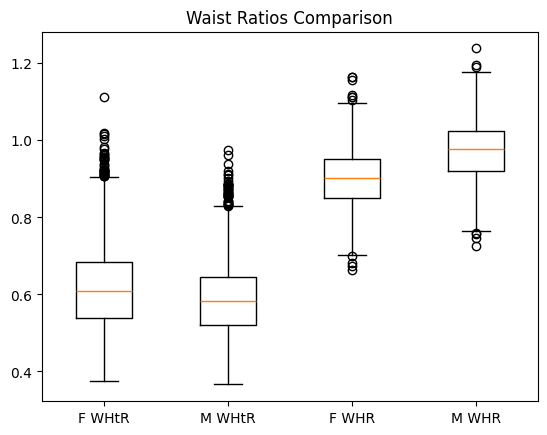

In [43]:
# Select required columns only
male_wh_data = male[:, [6, 1, 5]]      # waist, height, hip
female_wh_data = female[:, [6, 1, 5]]

# Remove rows with NaN only in these columns
male_wh_data = male_wh_data[np.isfinite(male_wh_data).all(axis=1)]
female_wh_data = female_wh_data[np.isfinite(female_wh_data).all(axis=1)]

# Compute ratios
male_wthr = male_wh_data[:,0] / male_wh_data[:,1]
male_whr  = male_wh_data[:,0] / male_wh_data[:,2]

female_wthr = female_wh_data[:,0] / female_wh_data[:,1]
female_whr  = female_wh_data[:,0] / female_wh_data[:,2]
plt.boxplot([female_wthr, male_wthr, female_whr, male_whr])

plt.xticks([1,2,3,4],
           ["F WHtR","M WHtR","F WHR","M WHR"])

plt.title("Waist Ratios Comparison")
plt.show()

In [ ]:
Males typically have higher waist-to-hip ratio

Waist-to-height ratios are similar but slightly higher for males

Suggests different fat distribution patterns

In [ ]:
Comparison of BMI, Waist-to-Height Ratio, and Waist-to-Hip Ratio
Body Mass Index (BMI):
Advantages:

Simple and inexpensive – Requires only height and weight.

Standardised and widely accepted – Used globally in epidemiology and clinical practice.

Good population-level indicator – Useful for large-scale health risk assessment.

Strong association with morbidity and mortality – Particularly for cardiovascular disease and diabetes.

Disadvantages:

Does not distinguish fat from muscle – Muscular individuals may be misclassified as overweight.

Ignores fat distribution – Central (abdominal) fat carries more health risk, but BMI does not capture this.

May vary across ethnic groups – Risk thresholds differ by population.

Limited individual diagnostic value – Better suited for population analysis than individual assessment.

Waist-to-Height Ratio (WHtR):

Advantages:

Accounts for body proportions – Adjusts waist size relative to height.

Better indicator of central obesity – Abdominal fat is strongly linked to metabolic risk.

Strong predictor of cardiovascular risk – Often superior to BMI in predicting cardiometabolic outcomes.

Simple rule-of-thumb interpretation – Waist should be less than half of height (WHtR < 0.5).

Disadvantages:

Still does not measure body composition directly – Cannot distinguish visceral from subcutaneous fat.

Measurement variability – Waist circumference measurement technique may vary.

Less widely standardised than BMI – Fewer universal clinical cut-offs.
Waist-to-Hip Ratio (WHR):

Advantages:

Captures fat distribution pattern – Differentiates “apple-shaped” from “pear-shaped” body types.

Associated with metabolic and cardiovascular risk.

Independent predictor of mortality in some studies.

Disadvantages:

Does not account for overall body size – Two individuals may have same WHR but very different body mass.

Less intuitive interpretation than BMI or WHtR.

Measurement error possible – Requires two circumferences to be measured accurately.

Hip circumference may reduce sensitivity in individuals with high muscle mass.

In [38]:
# Get BMI column index (7)
bmi_column = zfemale[:,7]

# Sort indices
sorted_indices = np.argsort(bmi_column)

# Select lowest 5 and highest 5
selected_indices = np.concatenate((sorted_indices[:5], sorted_indices[-5:]))

print(zfemale[selected_indices])

[[-2.07978523 -1.22299143 -1.5478402  -1.16905675 -2.1947611  -2.0405496
  -1.94212128 -2.05024028]
 [-1.88017988 -0.18929313 -1.71835247  0.38637892 -2.4443617  -1.85491922
  -2.05708015 -1.99487987]
 [-1.53667299  1.80730222  0.62619127  0.5730312  -2.26607556 -1.6756899
  -1.7064556  -1.97088383]
 [-1.843044   -0.26009438 -0.22637009  0.51081377 -2.30173278 -2.25178417
  -1.85590213 -1.94177591]
 [-1.61094475  0.88688592 -0.09848588  0.47970506 -2.21258971 -1.82931504
  -1.71220354 -1.89319577]
 [ 4.45612963  0.50455915  1.69189297 -1.13794804  3.34993787  3.98283607
   2.90339503  4.46201122]
 [ 4.34936397  0.27799514  2.84285081  1.94181459  4.36616887  3.9188256
   3.75409065  4.51466896]
 [ 4.8042785   0.88688592  2.11817365  1.81737973  3.77782461  4.02124236
   4.08172343  4.54270932]
 [ 4.36328993 -0.03353037 -0.05585782 -0.17357792  2.77942222  4.31569054
   4.57029862  4.76243308]
 [        nan         nan         nan         nan         nan         nan
          nan       

In [ ]:
Lowest BMI individuals show:

Lower weight

Smaller waist and hip values

Highest BMI individuals show:

Strong positive z-scores for weight, waist, hip

Indication of obesity